# Salary Prediction

The goal of this project is to clean the data, analysis and predict whether a person's salary is higher or lower than $50k/year based on their attributes using several ML classification techniques.

Imported Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
sal_data=pd.read_csv(r'C:\Users\USER\Downloads\salarydata.csv')

In [4]:
sal_data.head()

,age,workclass,education,education-num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours_per_week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
sal_data.shape

(32561, 14)

In [6]:
sal_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [7]:
sal_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital_status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours_per_week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [8]:
sal_data.nunique()

age                73
workclass           9
education          16
education-num      16
marital_status      7
occupation         15
relationship        6
race                5
sex                 2
capital-gain      119
capital-loss       92
hours_per_week     94
native-country     42
salary              2
dtype: int64

In [9]:
for i in sal_data.columns:
    print(i)
    print(sal_data[i].unique())
    print("-"*50)
    print("\n")

age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
--------------------------------------------------


workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
--------------------------------------------------


education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
--------------------------------------------------


education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
--------------------------------------------------


marital_status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
--------------------------------------------------


oc

In [10]:
def count_checker(sal_data):
    """count of each value under each feature in the data"""
    for col in sal_data.columns:
        print("Count for each category of values in {} feature.".format(col))
        print(sal_data[col].value_counts(),"\n")
        print("*"*40)


In [11]:
sal_data.isin(['?']).sum(axis=0)


age                  0
workclass         1836
education            0
education-num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours_per_week       0
native-country     583
salary               0
dtype: int64

In [12]:
sal_data['native-country'] = sal_data['native-country'].replace('?',np.nan)
sal_data['workclass'] = sal_data['workclass'].replace('?',np.nan)
sal_data['occupation'] = sal_data['occupation'].replace('?',np.nan)

In [13]:
sal_data.isna().sum()


age                  0
workclass         1836
education            0
education-num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours_per_week       0
native-country     583
salary               0
dtype: int64

In [14]:
for i in ['workclass','occupation','native-country']:
    sal_data[i]=sal_data[i].fillna(sal_data[i].mode()[0])

In [15]:
sal_data.isna().sum()


age               0
workclass         0
education         0
education-num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours_per_week    0
native-country    0
salary            0
dtype: int64

Successfully filled all the null values



<AxesSubplot:>

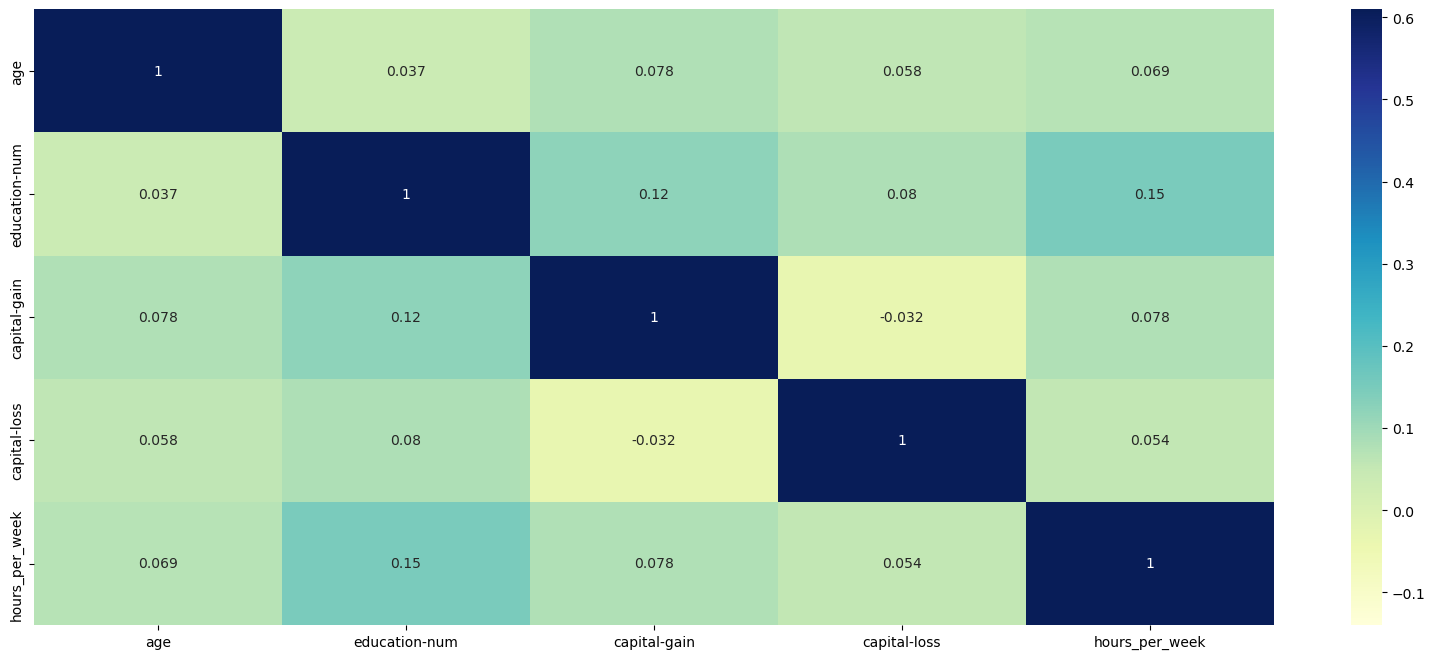

In [16]:
# Correlaton Matrix
corrmatrix=sal_data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,annot=True,vmin=-0.14,vmax=0.61,cmap='YlGnBu')

In [17]:
#Dropping irrelevant columns
sal_data=sal_data.drop(['education-num','capital-gain','capital-loss','native-country'],axis=1)
sal_data.head()


,age,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,<=50K


In [18]:
# Assigning the numerical columns to num_cols
num_cols =  sal_data.select_dtypes(["number"])

In [19]:
num_cols.head()


,age,hours_per_week
0,39,40
1,50,13
2,38,40
3,53,40
4,28,40


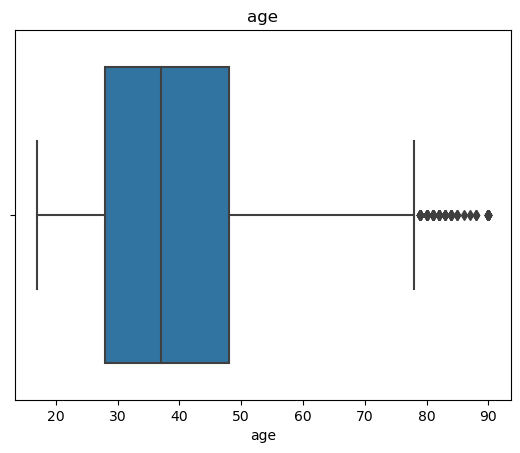

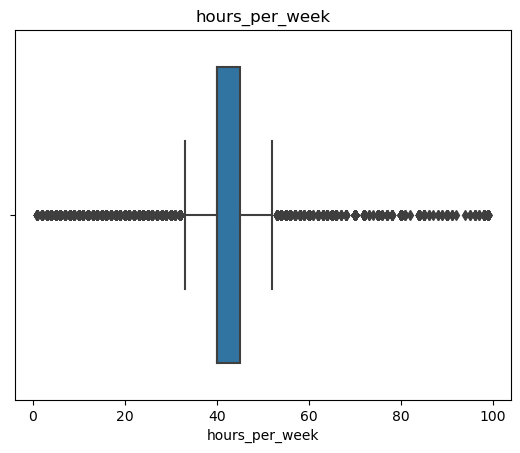

In [20]:
## checking outliers
for i in num_cols :
    plt.title(i)
    sns.boxplot(sal_data[i])
    plt.show()  

In [21]:
#Outlier Handling for the attribute Age
Q1=sal_data['age'].quantile(0.25) # 25th quantile
Q3=sal_data['age'].quantile(0.75)  # 75th quantile
IQR=Q3-Q1
Lower_Whisker = Q1 - 1.5*IQR 
Upper_Whisker = Q3 + 1.5*IQR
sal_data['age'] = np.clip(sal_data['age'], Lower_Whisker, Upper_Whisker) 
    # all the values smaller than Lower_Whisker will be assigned value of Lower_whisker 
    # and all the values above upper_whishker will be assigned value of upper_Whisker 

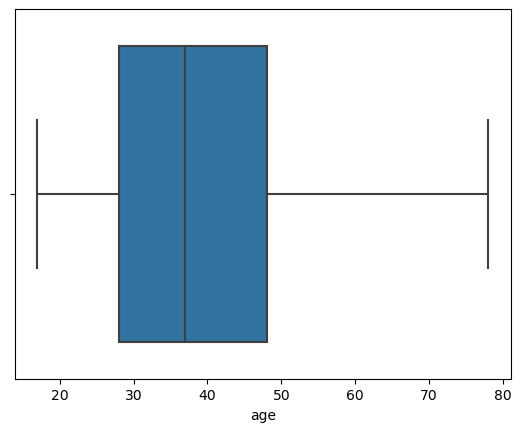

In [22]:
sns.boxplot(sal_data['age'])
plt.show()


Outlier clipped

In [23]:
sal_data['marital-status'].unique()

KeyError: 'marital-status'

In [24]:
sal_data['education'].unique()


array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

# UNIVARITE ANALYSIS

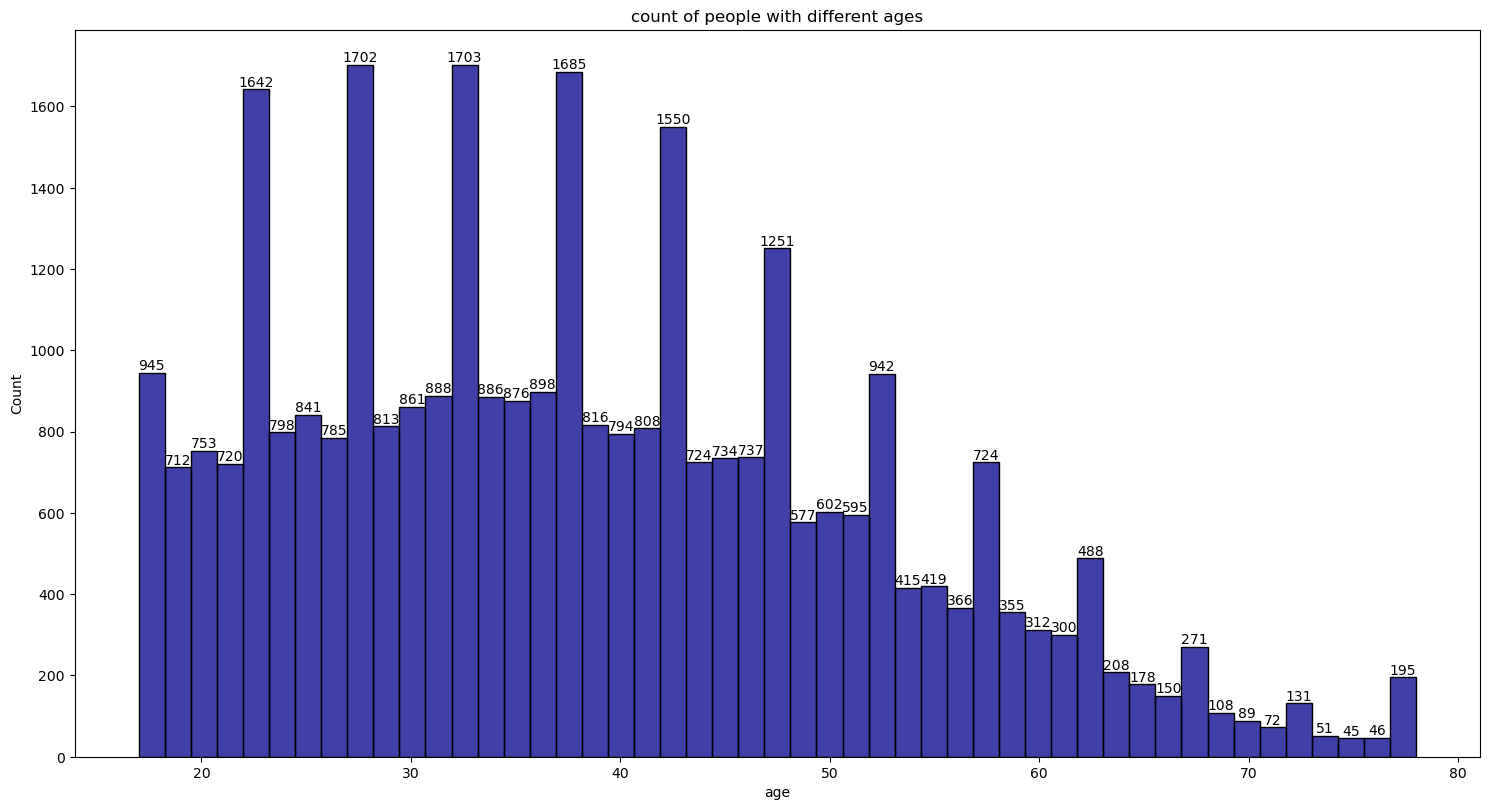

In [25]:
plt.figure(figsize=(15,8))
ax=sns.histplot(sal_data['age'],color='darkblue')
for p in ax.patches: 
    ax.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()), ha='center', va='center', xytext=(0,5),textcoords='offset points')
plt.tight_layout()
plt.title('count of people with different ages')
plt.show()

In [26]:
#we are defining a function for count plot
def labeled_countplot(a):
  plt.figure(figsize=(15,8))
  ax=sns.countplot(x=sal_data[a])
  total = len(sal_data)
  for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()/2
    ax.annotate(percentage, (x,y), ha='center', va='center')
  plt.tight_layout()
  plt.show()
  return

In [27]:
sal_data.columns

Index(['age', 'workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'hours_per_week', 'salary'],
      dtype='object')

In [28]:
labeled_countplot('marital-status')

KeyError: 'marital-status'

<Figure size 1500x800 with 0 Axes>

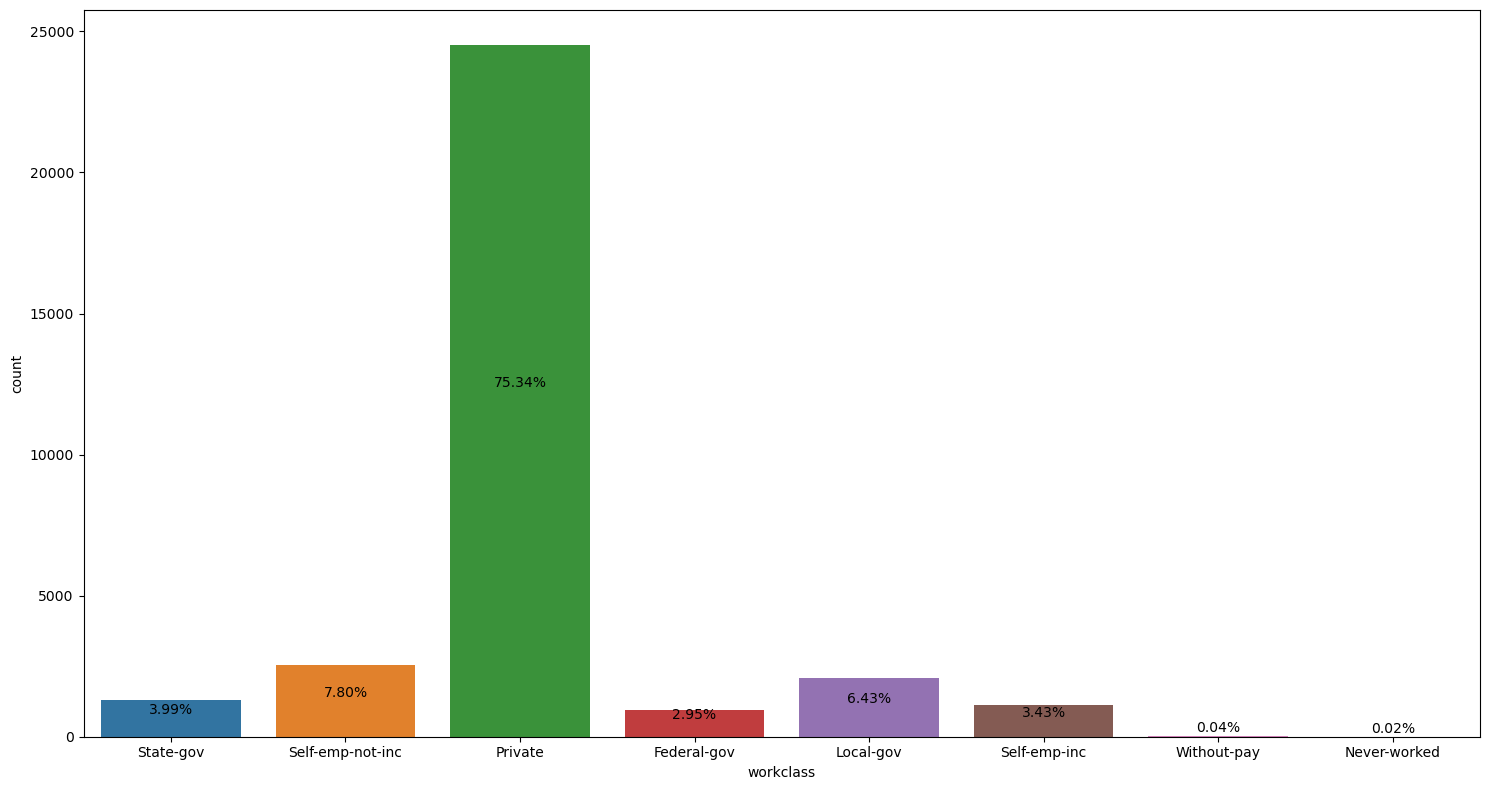

In [29]:
labeled_countplot('workclass')

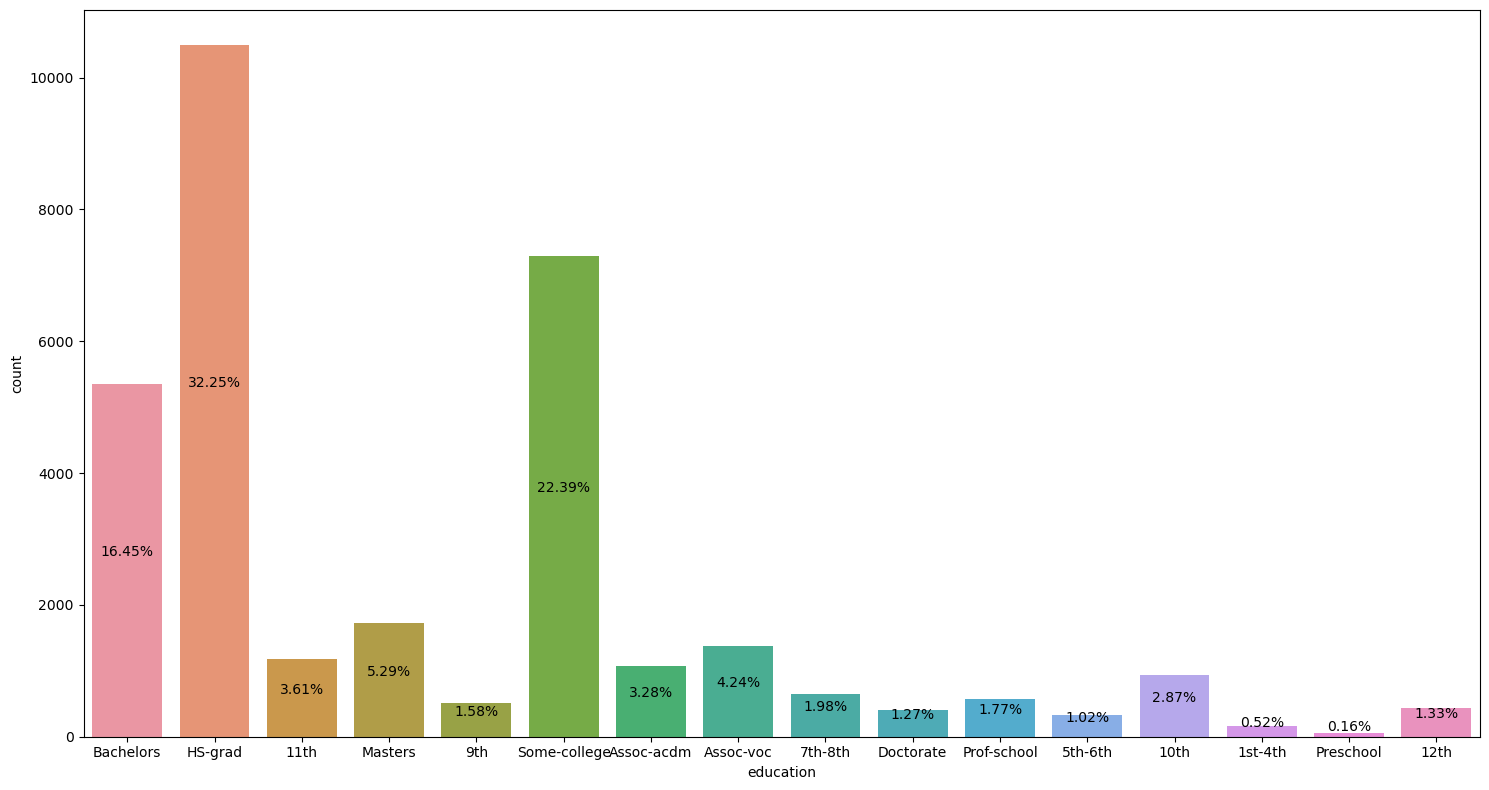

In [30]:
labeled_countplot('education')


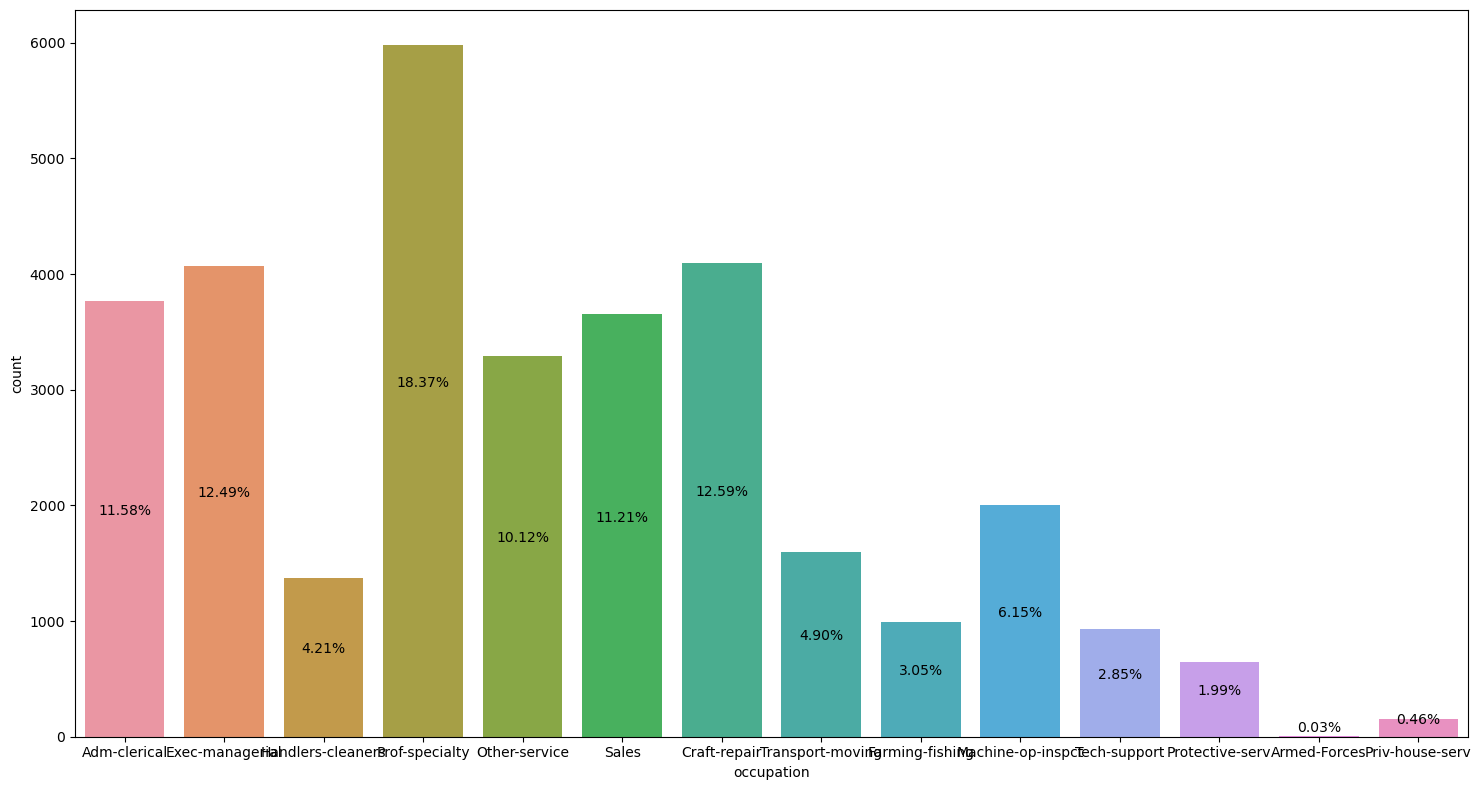

In [31]:
labeled_countplot('occupation')

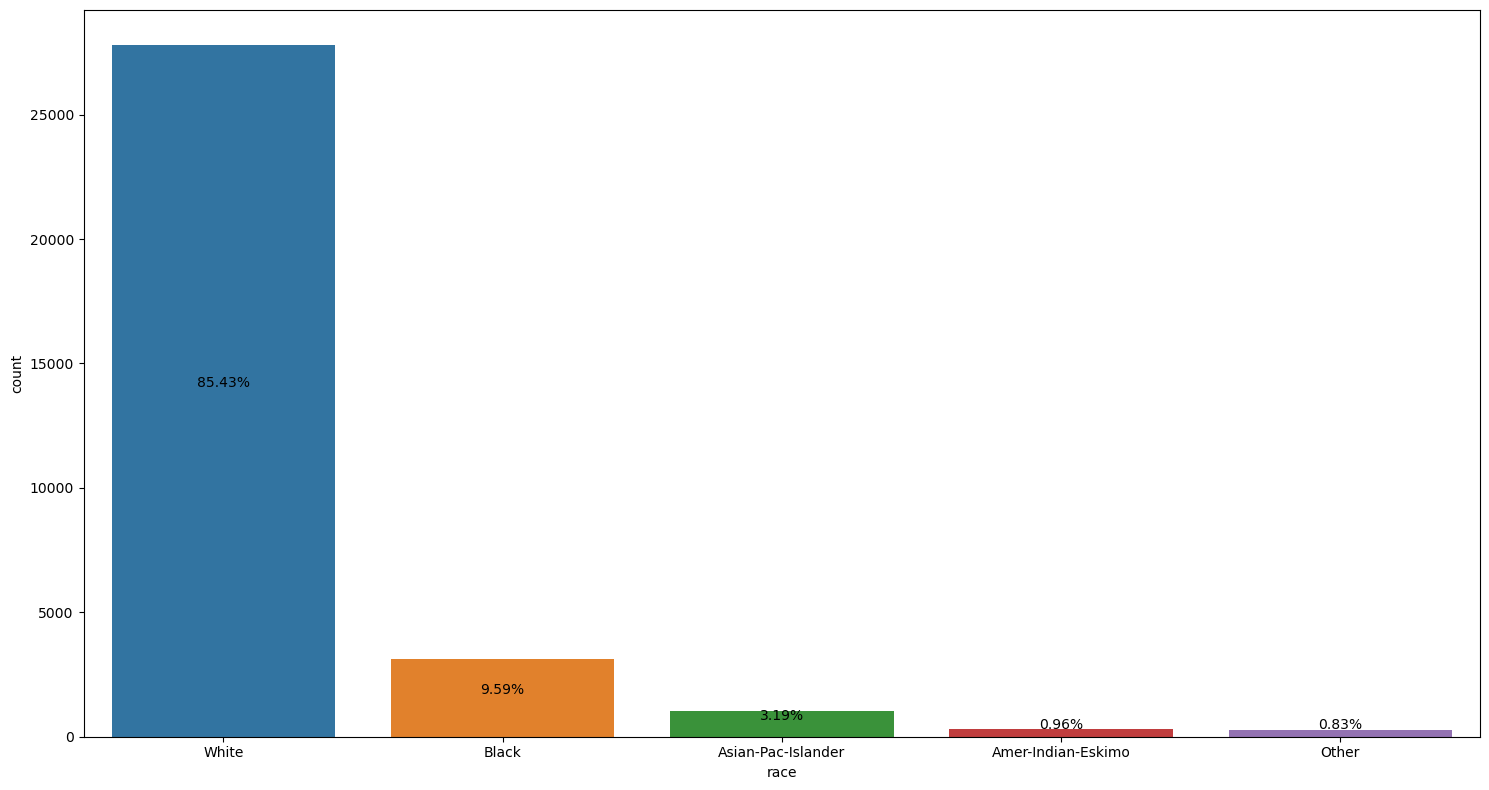

In [32]:
labeled_countplot('race')


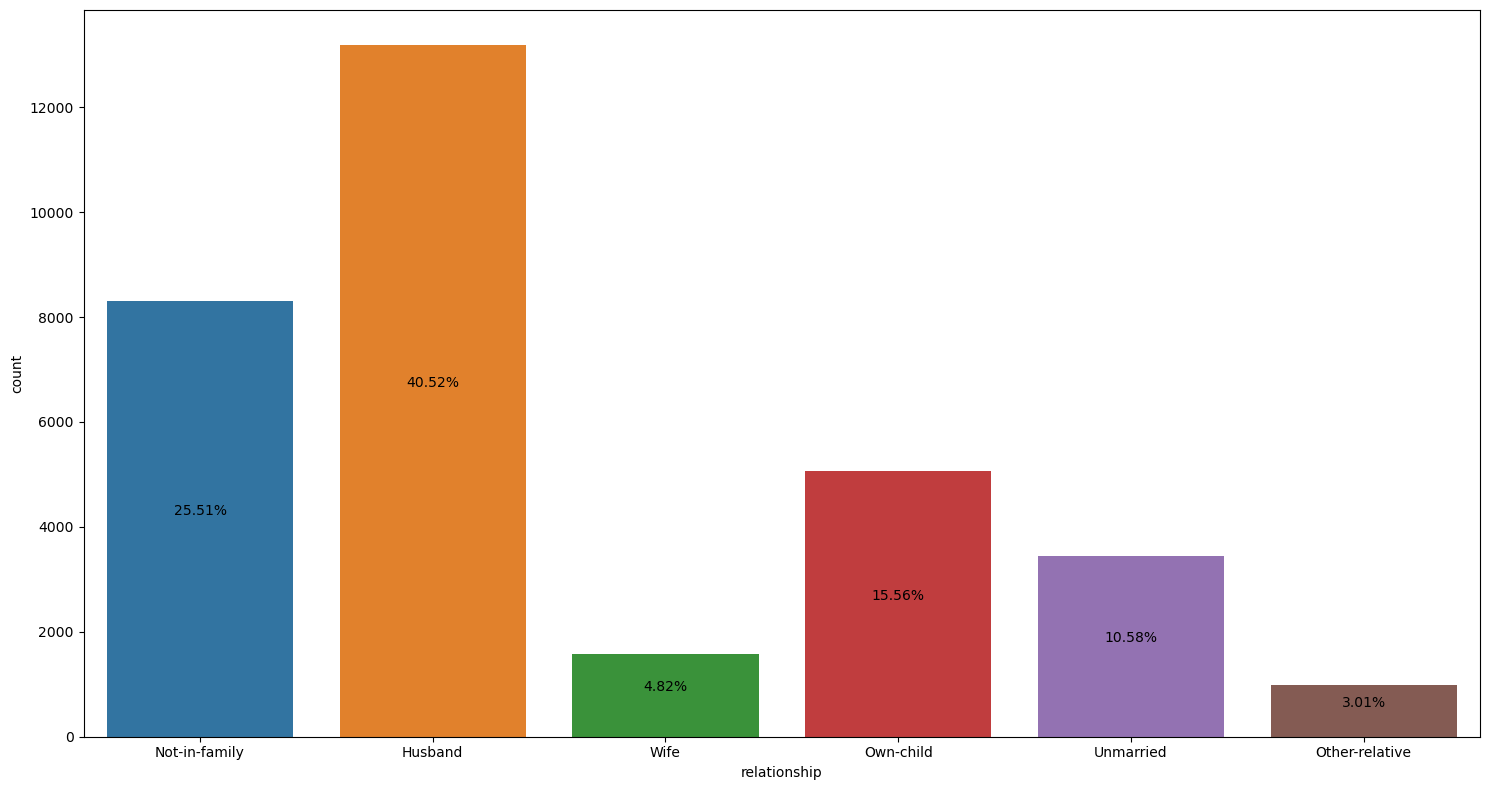

In [33]:
labeled_countplot('relationship')


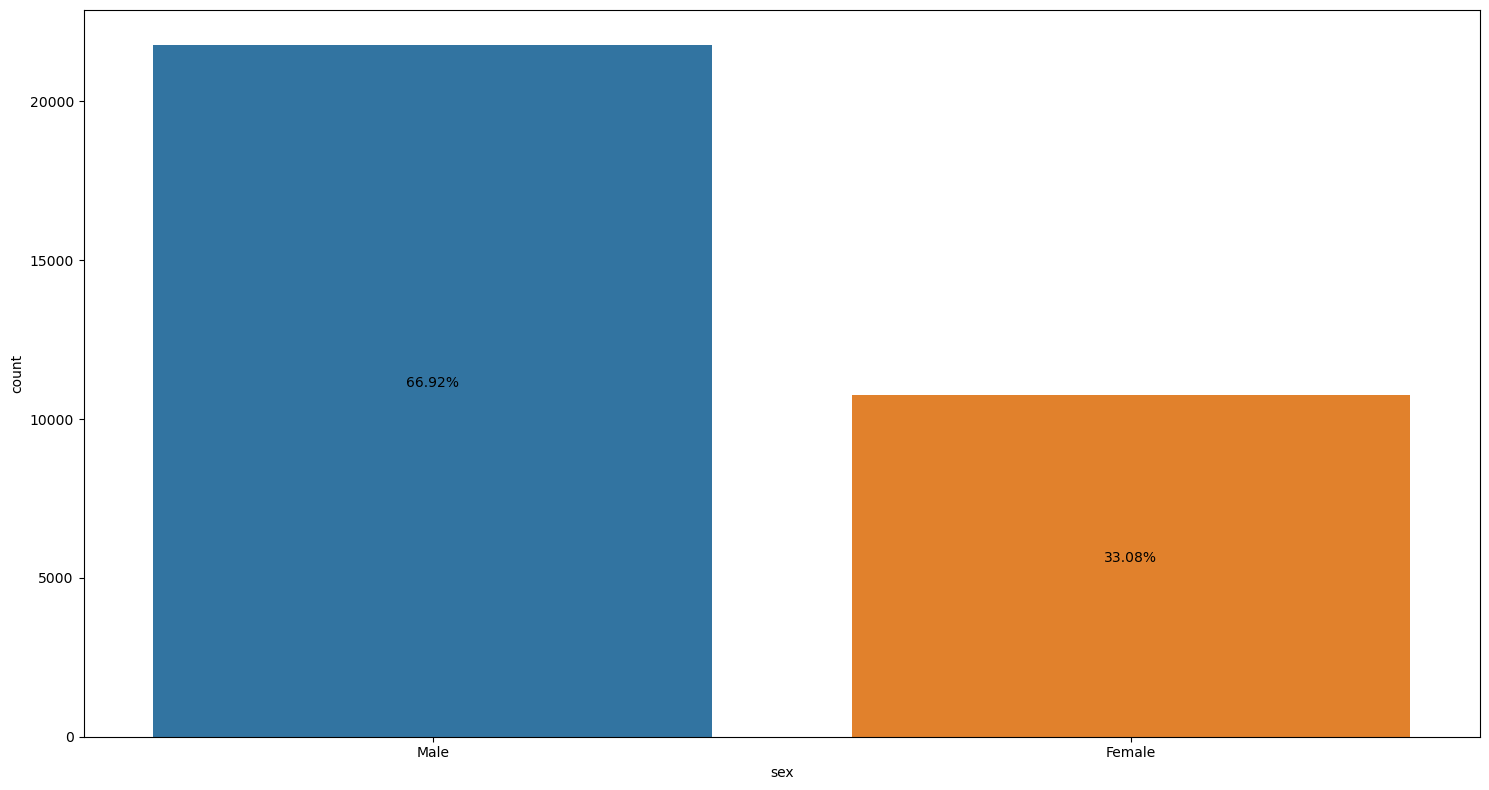

In [34]:
labeled_countplot('sex')

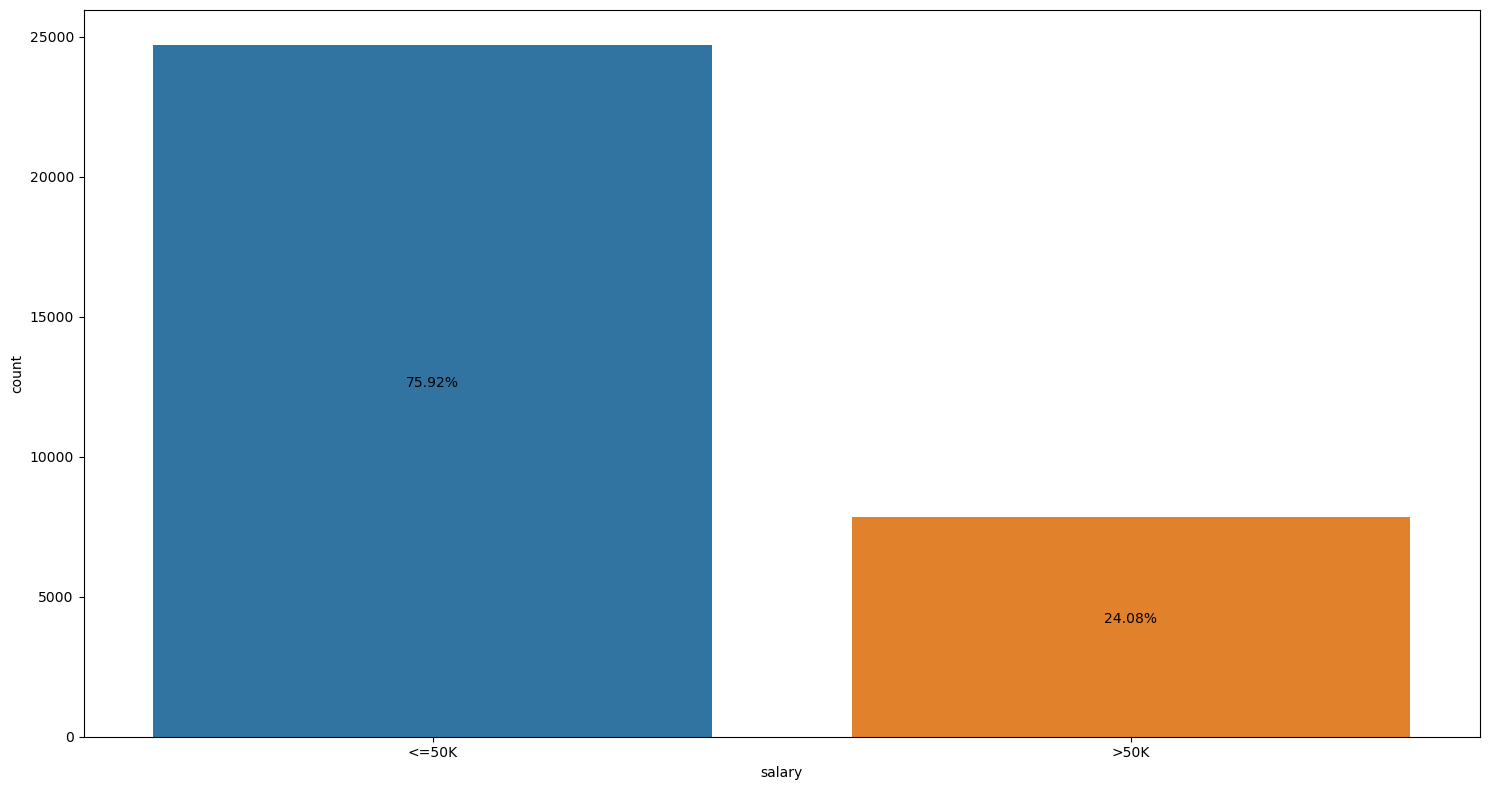

In [35]:
labeled_countplot('salary')

### BIVARIATE

In [36]:
def labeled_bar(a,b):
    sns.set(style="ticks")
    ax=sns.barplot(x=sal_data[a],y=sal_data[b],color='b')
    plt.grid(color='b',linewidth=0.3)
    plt.tight_layout()
    plt.show()
    return

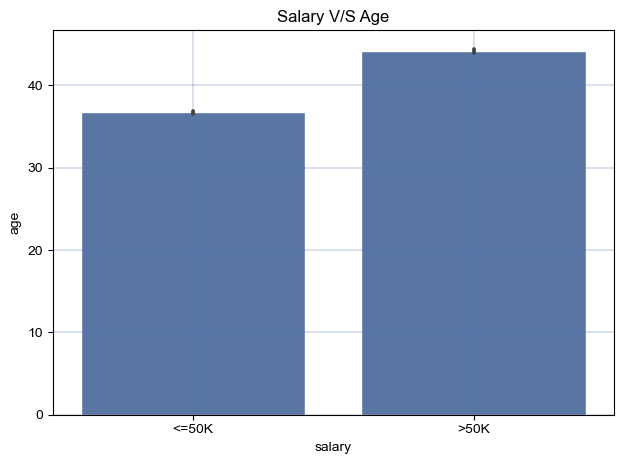

In [37]:
plt.title("Salary V/S Age")
labeled_bar('salary','age')

KeyError: 'hours-per-week'

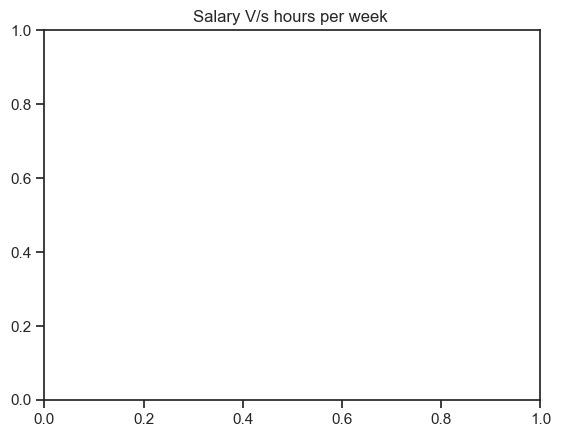

In [41]:
plt.title("Salary V/s hours per week ")
labeled_bar('salary','hours-per-week')

In [39]:
def labeled_bar(a,b):
    sns.set(style="ticks")
    ax=sns.barplot(x=sal_data[a],y=sal_data[b],color='b')
    plt.grid(color='b',linewidth=0.3)
    plt.tight_layout()
    plt.show()
    return


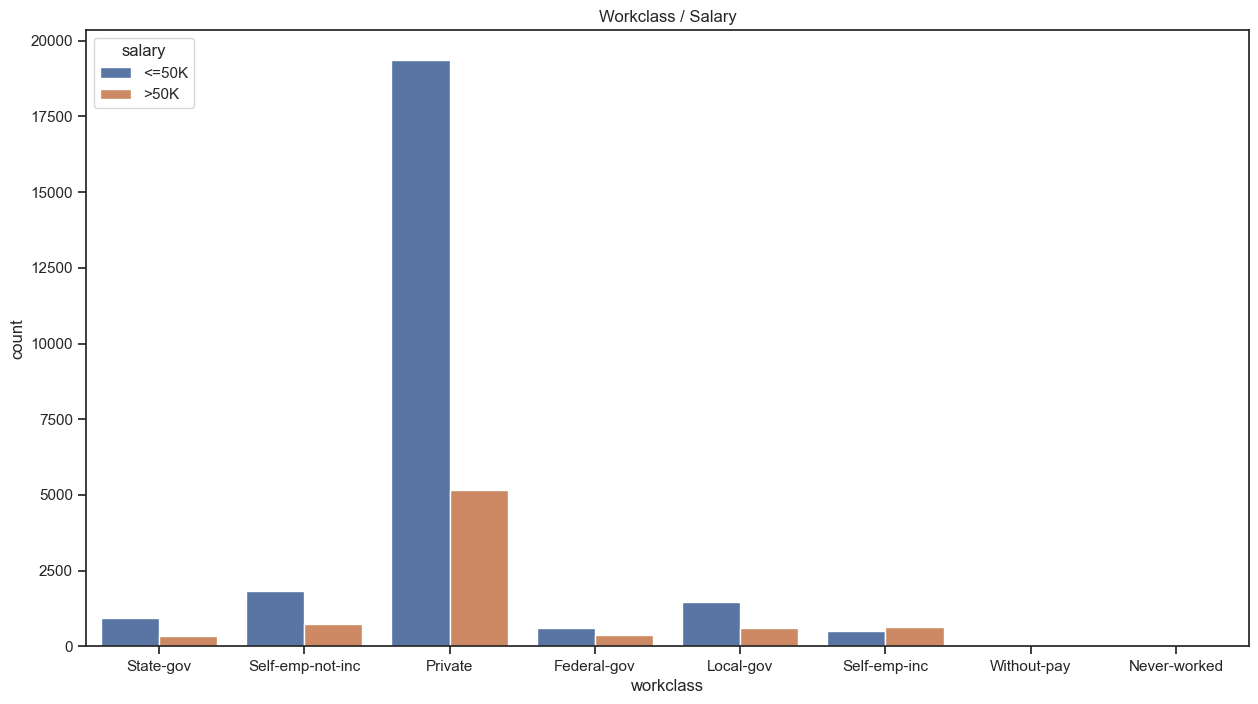

In [42]:
plt.figure(figsize=(15,8))
plt.title('Workclass / Salary')
sns.countplot(x="workclass", hue="salary", data=sal_data)
plt.show()


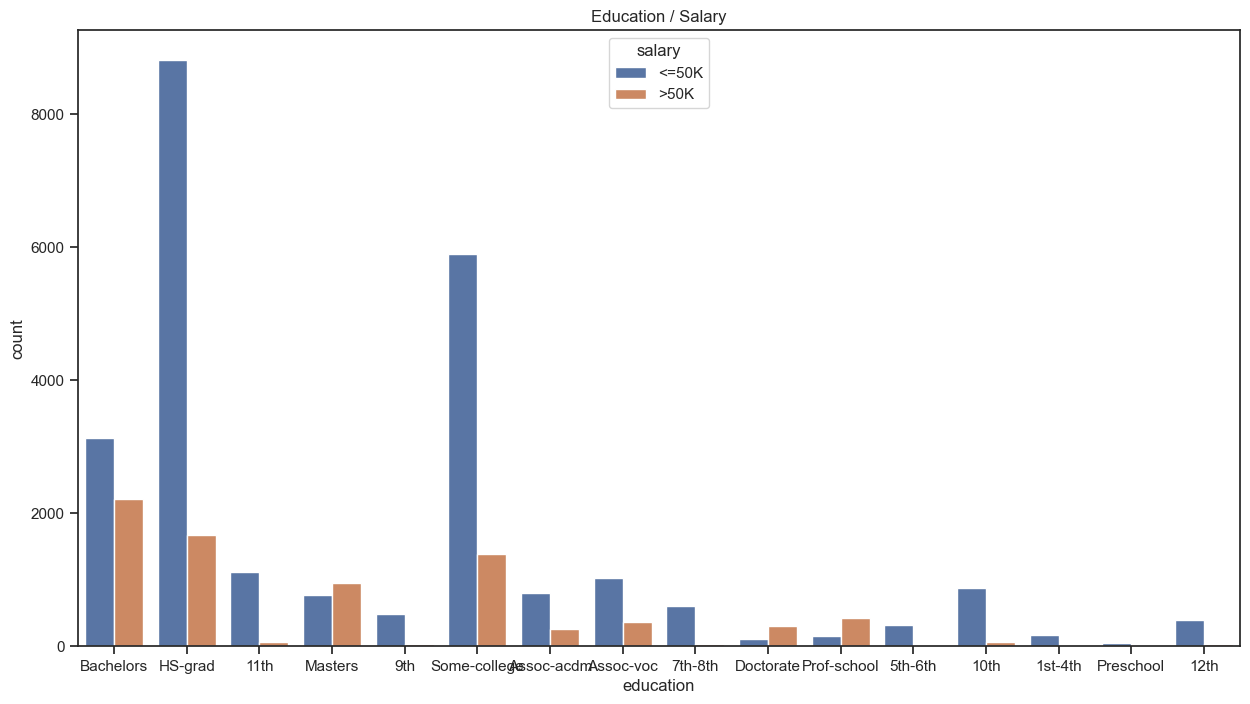

In [43]:
plt.figure(figsize=(15,8))
plt.title('Education / Salary')
sns.countplot(x="education", hue="salary", data=sal_data)
plt.show()

ValueError: Could not interpret input 'marital-status'

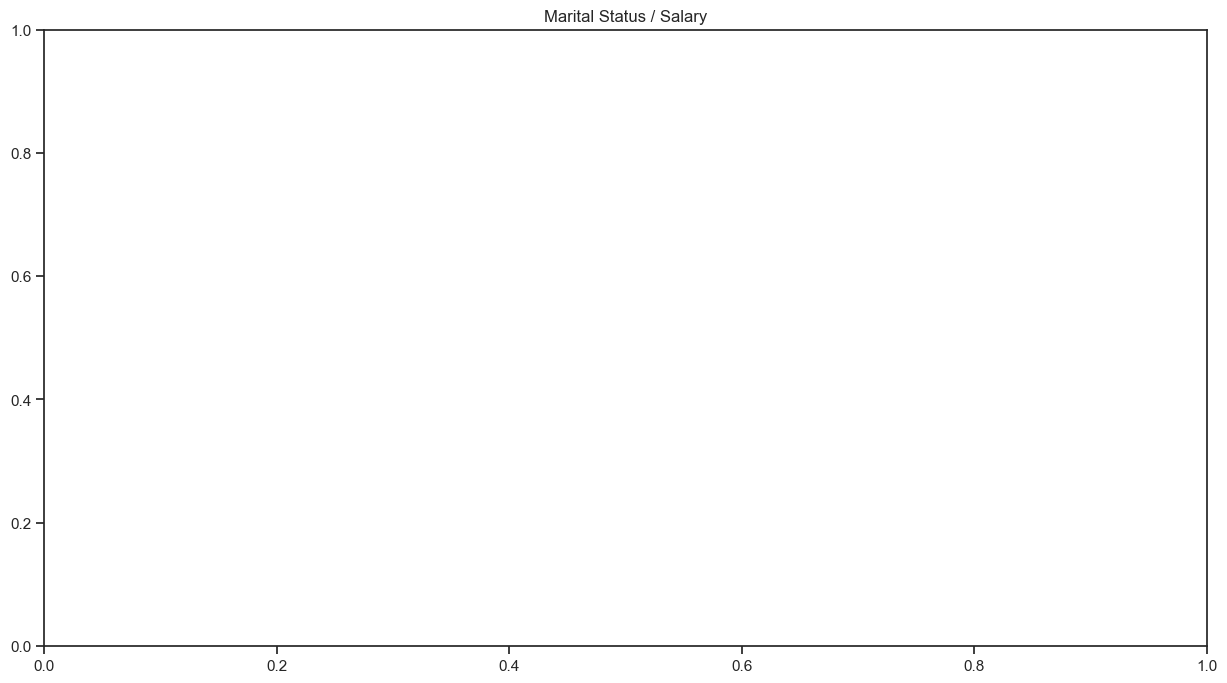

In [44]:
plt.figure(figsize=(15,8))
plt.title('Marital Status / Salary')
sns.countplot(x="marital-status", hue="salary", data=sal_data)
plt.show()

KeyError: 'hours-per-week'

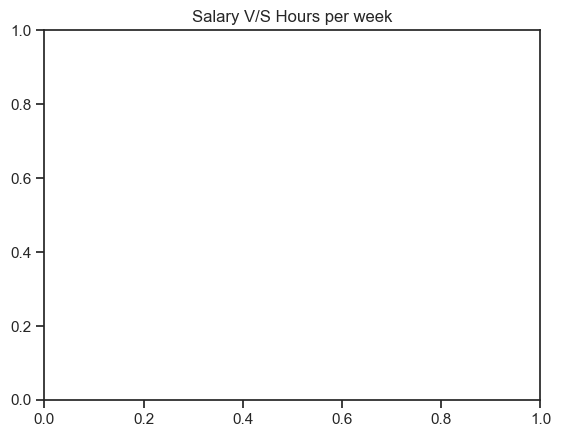

In [45]:
plt.title("Salary V/S Hours per week")
labeled_bar('salary','hours-per-week')

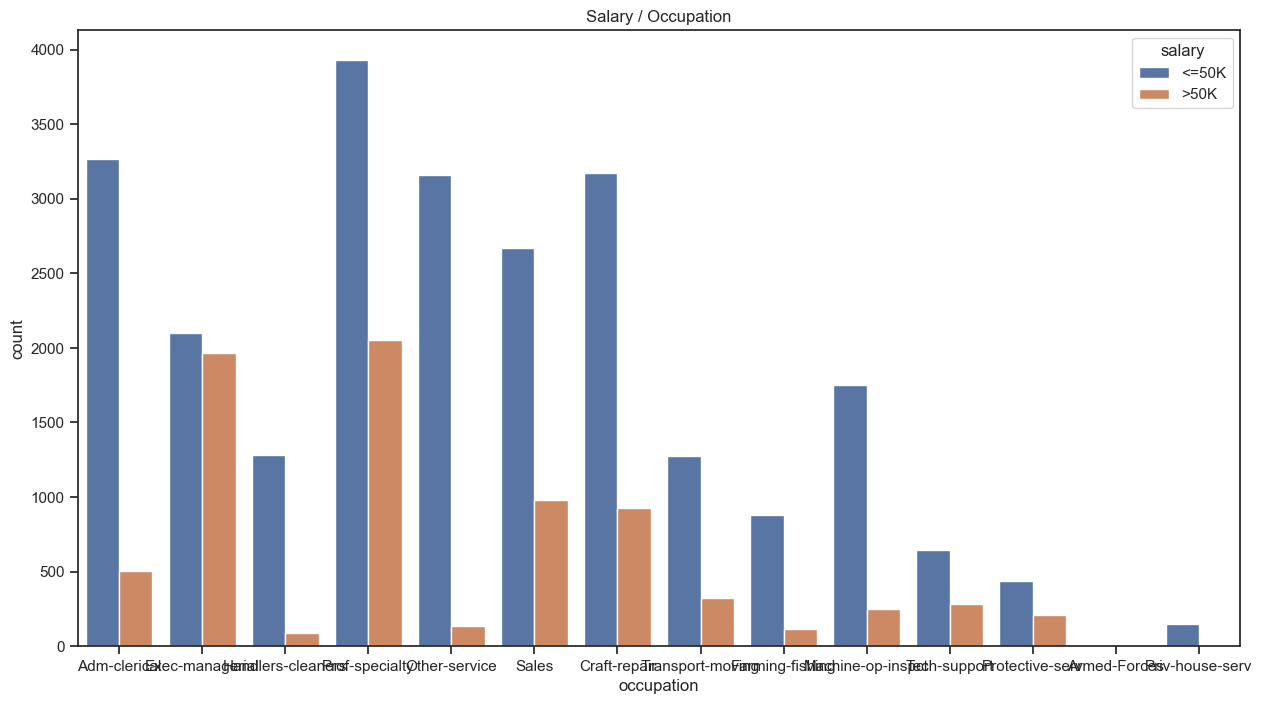

In [46]:
plt.figure(figsize=(15,8))
plt.title('Salary / Occupation')
sns.countplot(x="occupation", hue="salary", data=sal_data)
plt.show()

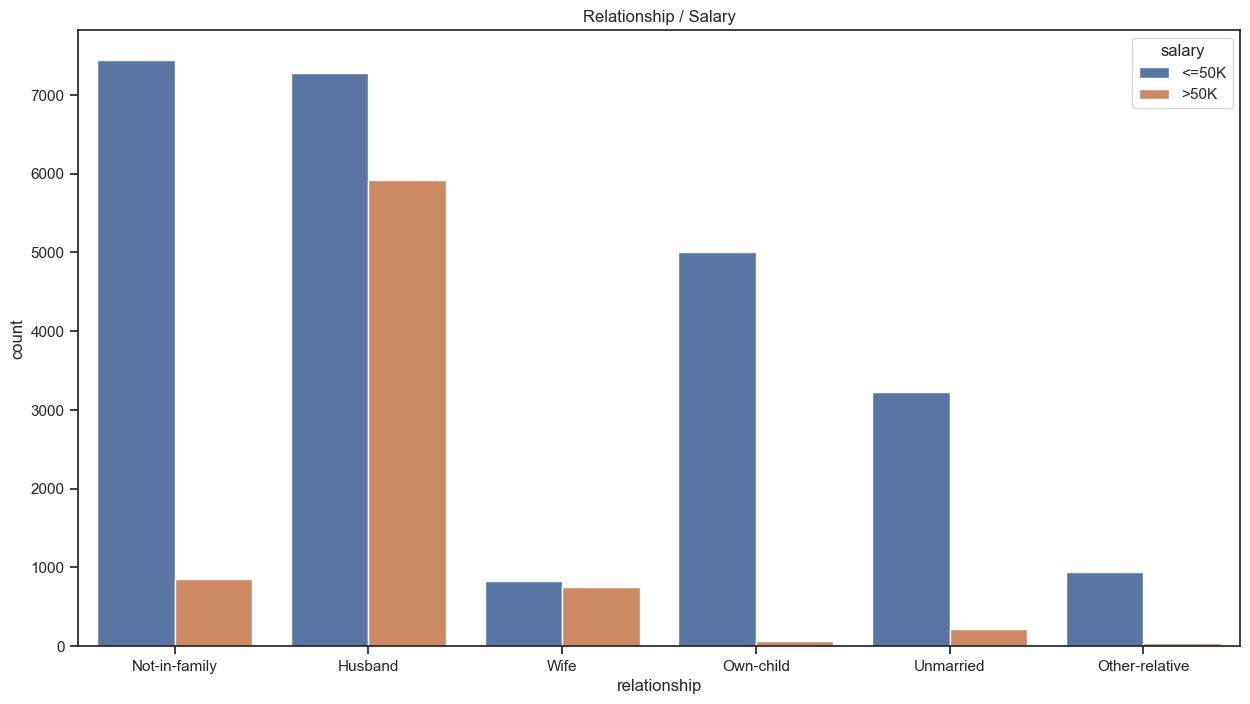

In [47]:
plt.figure(figsize=(15,8))
plt.title('Relationship / Salary')
sns.countplot(x="relationship", hue="salary", data=sal_data)
plt.show()


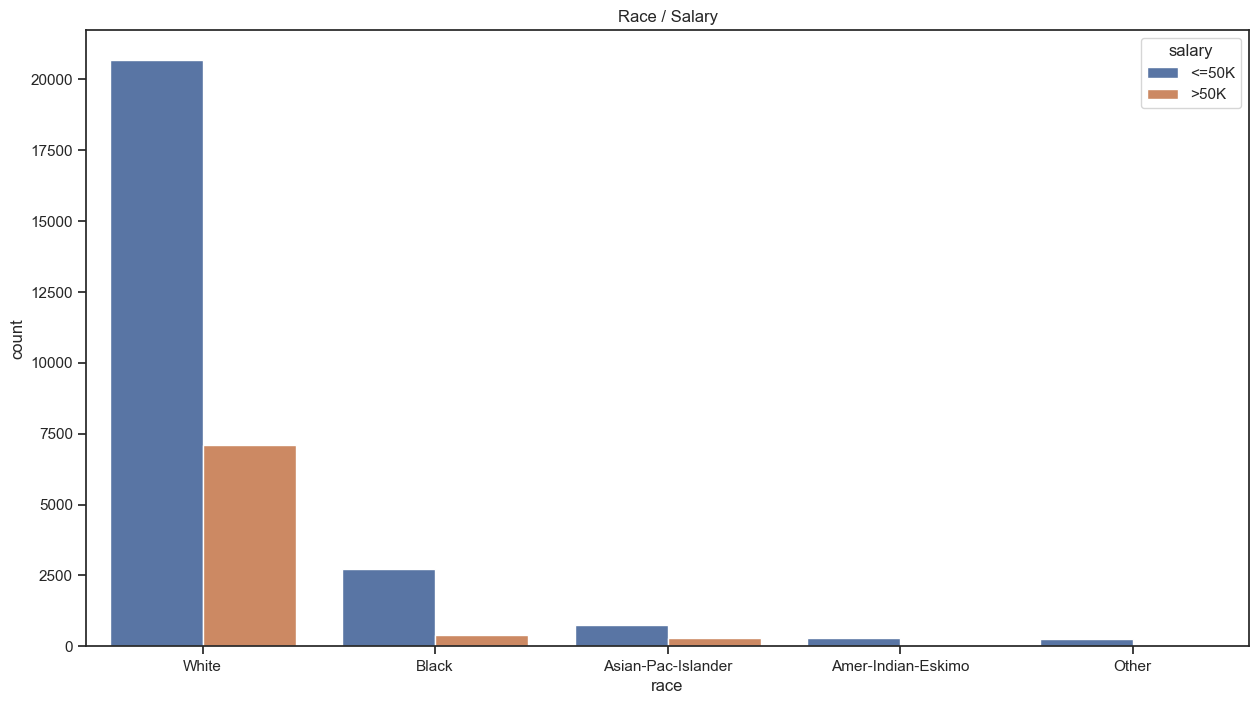

In [48]:
plt.figure(figsize=(15,8))
plt.title('Race / Salary')
sns.countplot(x="race", hue="salary", data=sal_data)
plt.show()

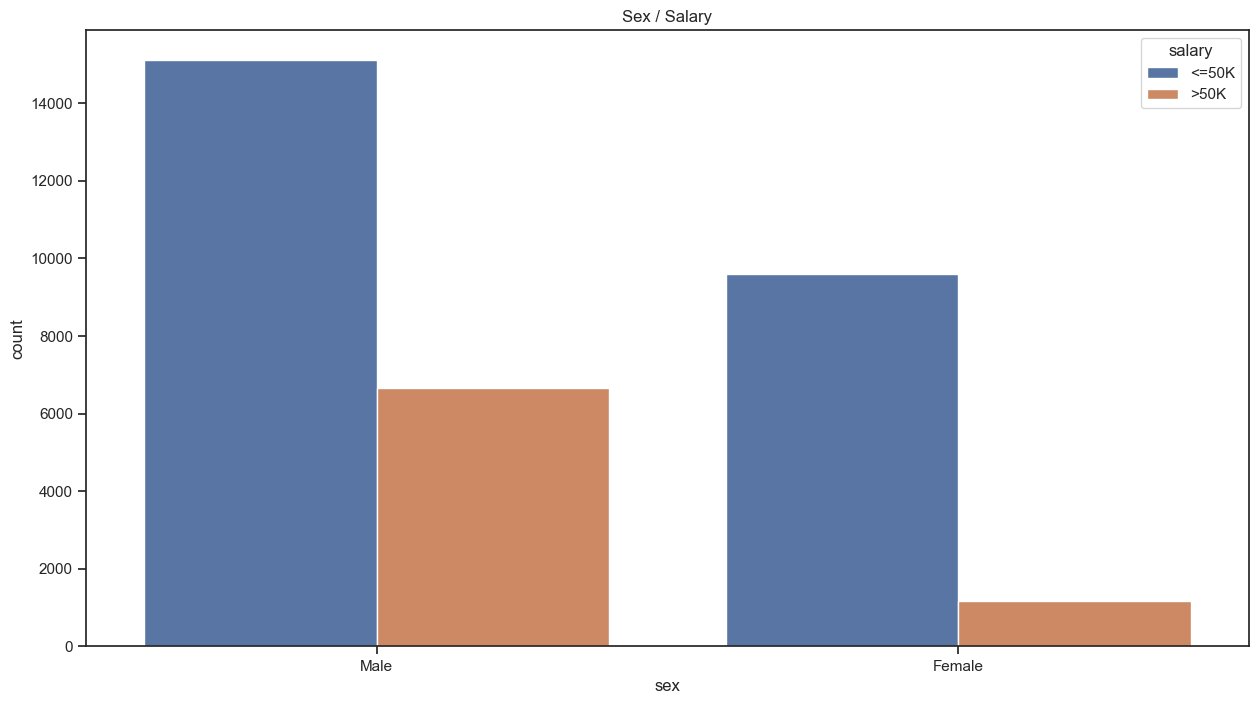

In [49]:
plt.figure(figsize=(15,8))
plt.title('Sex / Salary')
sns.countplot(x="sex", hue="salary", data=sal_data)
plt.show()

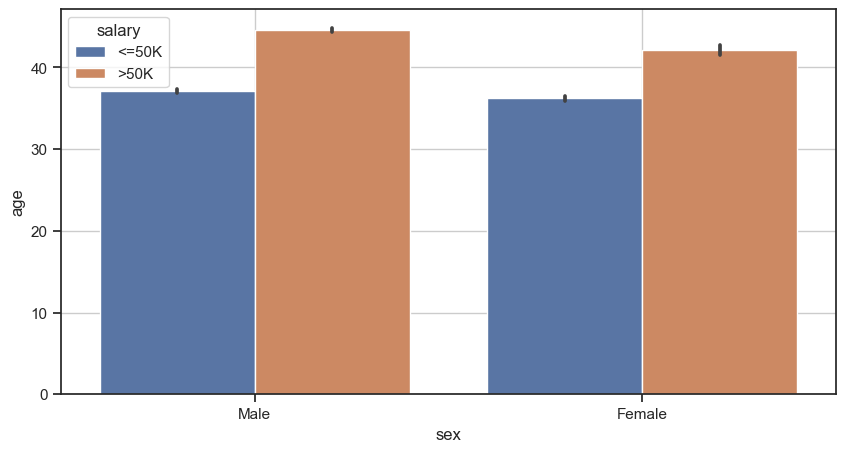

In [50]:
plt.figure(figsize=(10,5))
sns.barplot(x=sal_data['sex'],y=sal_data['age'],hue=sal_data['salary'])
plt.grid()
plt.show()

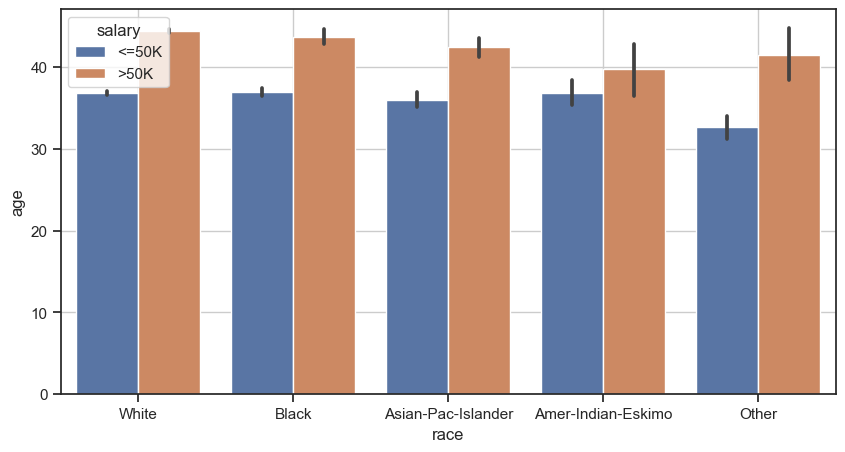

In [51]:
plt.figure(figsize=(10,5))
sns.barplot(x=sal_data['race'],y=sal_data['age'],hue=sal_data['salary'])
plt.grid()
plt.show()

In [52]:
plt.figure(figsize=(10,5))
sns.barplot(x=sal_data['workclass'],y=sal_data['hours-per-week'],hue=sal_data['salary'])
plt.grid()
plt.show()


KeyError: 'hours-per-week'

<Figure size 1000x500 with 0 Axes>

In [53]:
sal_data


,age,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week,salary
0,39.0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,<=50K
1,50.0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,<=50K
2,38.0,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
3,53.0,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K
4,28.0,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,<=50K
...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,<=50K
32557,40.0,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,>50K
32558,58.0,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,<=50K
32559,22.0,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,<=50K


In [54]:
#Replaced salary <=50K with 0 and >50K with 1
sal_data.salary = sal_data.salary.replace('<=50K',0)
sal_data.salary = sal_data.salary.replace('>50K',1)

In [55]:
sal_data.tail()


,age,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week,salary
32556,27.0,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,0
32557,40.0,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,1
32558,58.0,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,0
32559,22.0,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,0
32560,52.0,Self-emp-inc,HS-grad,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,1


<AxesSubplot:>

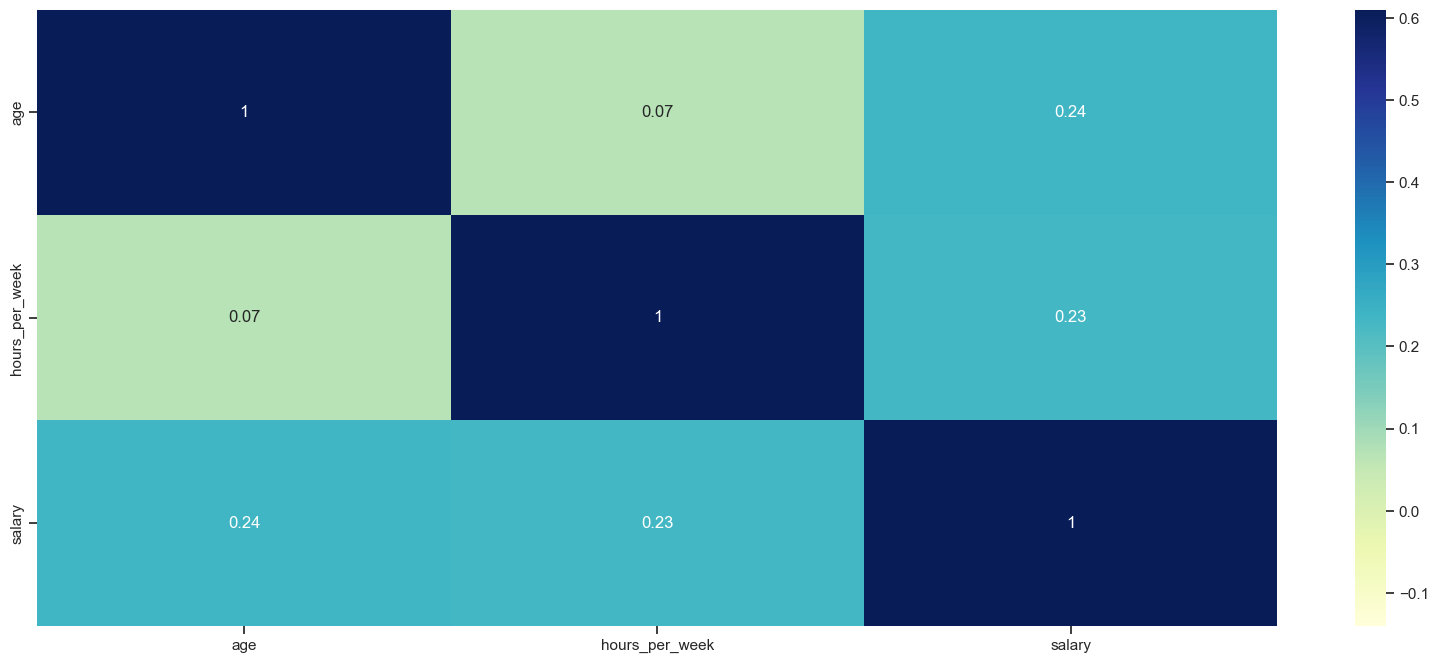

In [56]:
corrmatrix=sal_data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,annot=True,vmin=-0.14,vmax=0.61,cmap='YlGnBu')


In [57]:
sal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   workclass       32561 non-null  object 
 2   education       32561 non-null  object 
 3   marital_status  32561 non-null  object 
 4   occupation      32561 non-null  object 
 5   relationship    32561 non-null  object 
 6   race            32561 non-null  object 
 7   sex             32561 non-null  object 
 8   hours_per_week  32561 non-null  int64  
 9   salary          32561 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.5+ MB
